<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_WEEK10_ASSIGNMENT_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 137ms/step - accuracy: 0.1262 - loss: 2.3004 - val_accuracy: 0.1534 - val_loss: 2.2930
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 135ms/step - accuracy: 0.1566 - loss: 2.2910 - val_accuracy: 0.1539 - val_loss: 2.2850
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.1584 - loss: 2.2827 - val_accuracy: 0.1620 - val_loss: 2.2756
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 135ms/step - accuracy: 0.1657 - loss: 2.2728 - val_accuracy: 0.1751 - val_loss: 2.2632
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 134ms/step - accuracy: 0.1766 - loss: 2.2604 - val_accuracy: 0.1839 - val_loss: 2.2463
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 133ms/step - accuracy: 0.1910 - loss: 2.2433 - val_accuracy: 0.1924 - val_loss: 2.2237
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 134ms/step - accuracy: 0.2020 - loss: 2.2180 - val_accuracy: 0.2129 - val_loss: 2.1957
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 134ms/step - ac

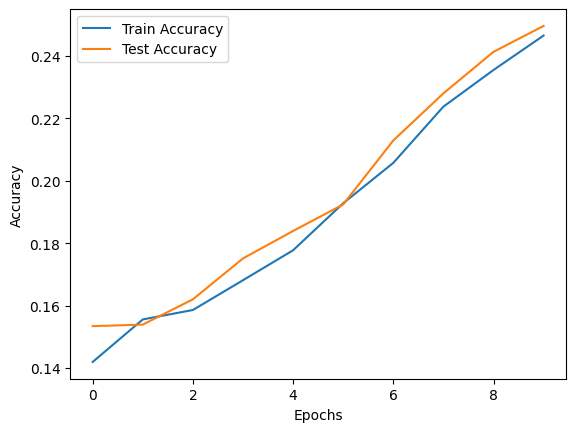

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN Model (based on the architecture given)
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    return model

model = build_model()
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training and testing data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()